In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load your dataset, assuming it's in a CSV file with columns 'Date' and 'Price'
data = pd.read_csv('/content/stock data/tatastock.csv')

In [ ]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-3-8db2a88aaa6f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Set 'Date' column as index
data.set_index('Date', inplace=True)

In [ ]:
# Check the first few rows of the dataframe
print(data.head())

            Price
Date             
2019-04-15  53.69
2019-05-13  43.95
2019-06-17  49.77
2019-07-15  45.81
2019-08-13  36.31


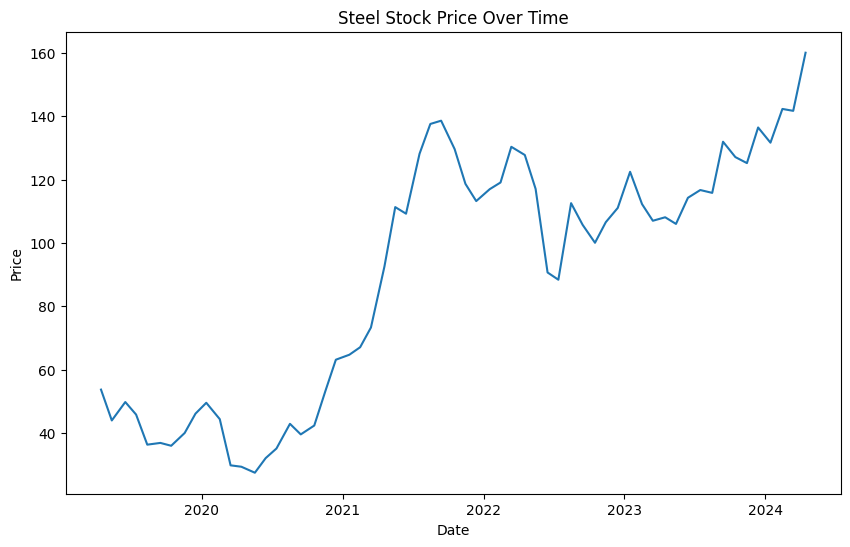

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Steel Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:

# Define ARIMA model
model = ARIMA(train, order=(5,1,0)) # ARIMA(p,d,q) - You may need to tune these parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -169.606
Date:                Wed, 08 May 2024   AIC                            351.213
Time:                        05:41:10   BIC                            362.314
Sample:                             0   HQIC                           355.390
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3163      0.192      1.643      0.100      -0.061       0.693
ar.L2         -0.2058      0.162     -1.272      0.204      -0.523       0.111
ar.L3          0.0664      0.174      0.381      0.7

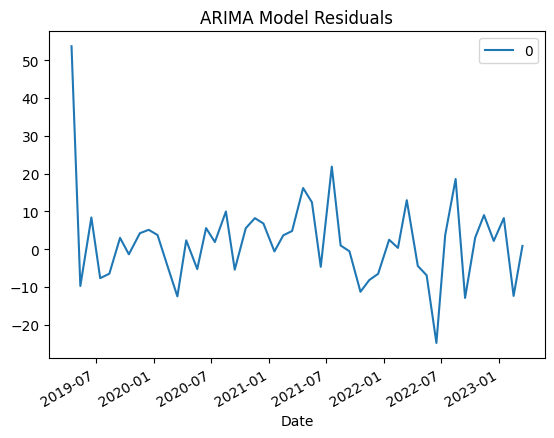

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Model Residuals')
plt.show()

In [ ]:
# Predictions
history = [x for x in train['Price']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Price'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=109.096212, expected=108.100000
predicted=109.465115, expected=106.000000
predicted=106.513353, expected=114.250000
predicted=115.782329, expected=116.700000
predicted=114.713173, expected=115.800000
predicted=115.902873, expected=131.950000
predicted=136.517183, expected=127.100000
predicted=123.995422, expected=125.200000
predicted=127.758554, expected=136.450000
predicted=137.474733, expected=131.650000
predicted=131.837021, expected=142.300000
predicted=146.491070, expected=141.700000
predicted=137.211114, expected=160.050000


In [ ]:
# Calculate RMSE (Root Mean Squared Error)
error = mean_squared_error(test['Price'], predictions, squared=False)
print('Test RMSE: %.3f' % error)

Test RMSE: 9.552


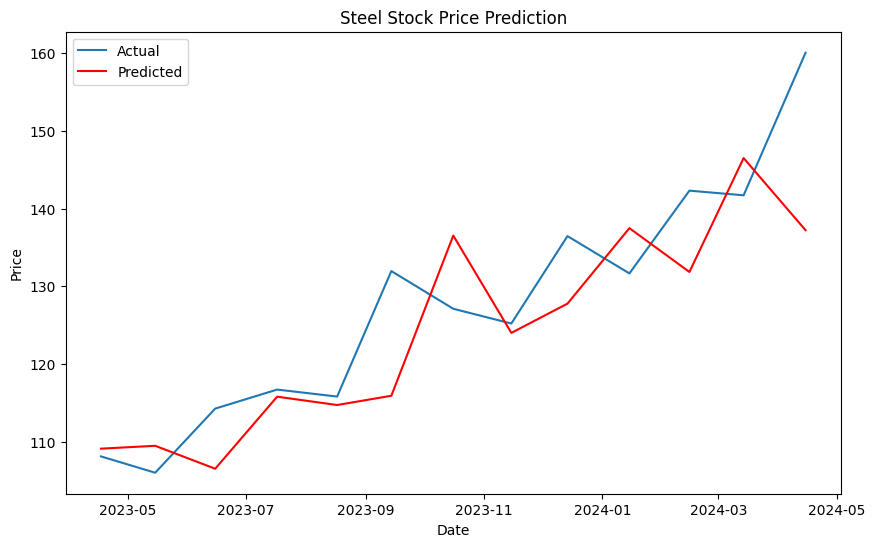

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Steel Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert price changes to binary classes (up or down)
test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)

# Calculate binary predictions
binary_predictions = [1 if pred > 0 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(test['Price_Class'], binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.46153846153846156


<ipython-input-16-8734ac14d26d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(test['Price_Class'], binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

F1 Score: 0.631578947368421


In [ ]:
data = pd.read_csv('/content/stock data/adanistock.csv')

In [ ]:
# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-27-8db2a88aaa6f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
print(data.head())

             Price
Date              
2019-04-15  142.85
2019-05-13  119.30
2019-06-17  146.30
2019-07-15  131.30
2019-08-13  138.80


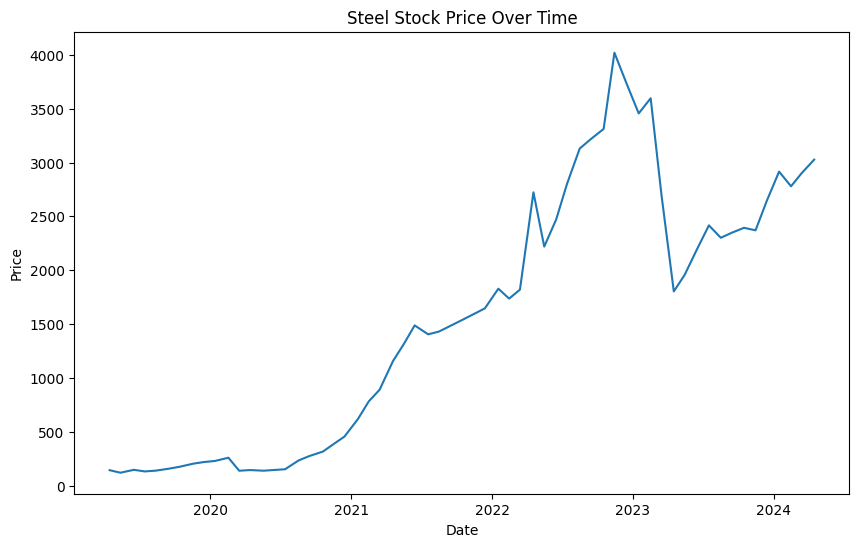

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Steel Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
# Define ARIMA model
model = ARIMA(train, order=(5,1,0)) # ARIMA(p,d,q) - You may need to tune these parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -322.917
Date:                Wed, 08 May 2024   AIC                            657.833
Time:                        06:09:06   BIC                            668.934
Sample:                             0   HQIC                           662.011
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1531      0.150     -1.017      0.309      -0.448       0.142
ar.L2          0.1606      0.166      0.967      0.333      -0.165       0.486
ar.L3          0.4650      0.238      1.954      0.0

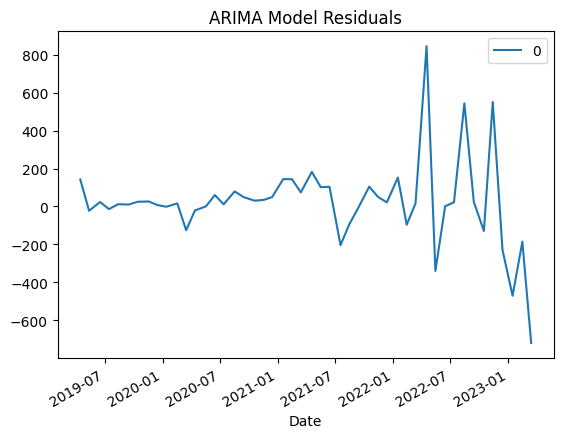

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Model Residuals')
plt.show()

In [ ]:
# Predictions
history = [x for x in train['Price']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Price'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=2692.063090, expected=1803.000000
predicted=1655.753490, expected=1956.050000
predicted=1395.127203, expected=2186.170000
predicted=1836.221178, expected=2416.300000
predicted=2862.589738, expected=2301.230000
predicted=2437.660434, expected=2347.490000
predicted=2385.248153, expected=2393.750000
predicted=2338.837543, expected=2370.620000
predicted=2358.103123, expected=2643.130000
predicted=2692.310165, expected=2915.650000
predicted=2925.265415, expected=2779.390000
predicted=2809.177577, expected=2903.170000
predicted=2978.462940, expected=3026.950000


In [ ]:
# Calculate RMSE (Root Mean Squared Error)
error = mean_squared_error(test['Price'], predictions, squared=False)
print('Test RMSE: %.3f' % error)

Test RMSE: 423.427


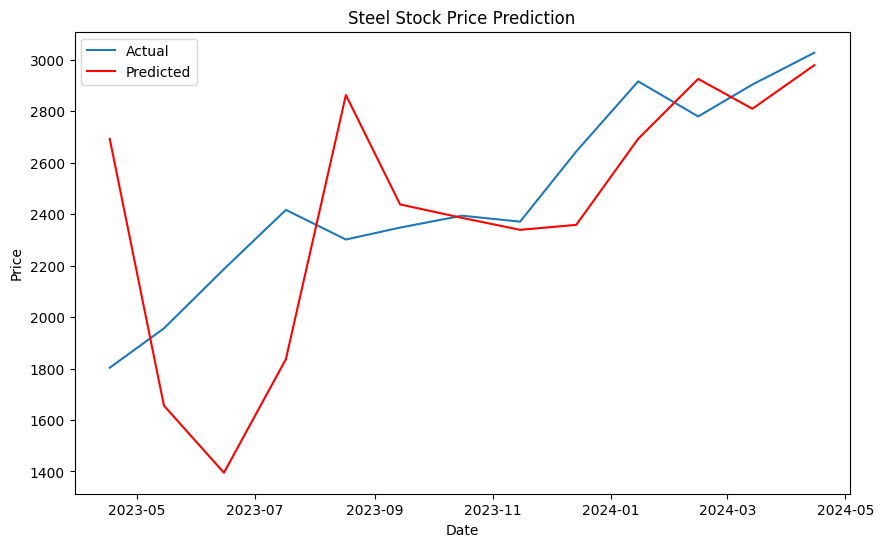

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Steel Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert price changes to binary classes (up or down)
test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)

# Calculate binary predictions
binary_predictions = [1 if pred > 0 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(test['Price_Class'], binary_predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(test['Price_Class'], binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

Accuracy: 0.6923076923076923
F1 Score: 0.8181818181818181


<ipython-input-38-cc1386755167>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)


In [ ]:
data = pd.read_csv('/content/stock data/jindalstock.csv')

In [ ]:

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-40-8db2a88aaa6f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Set 'Date' column as index
data.set_index('Date', inplace=True)

In [ ]:
# Check the first few rows of the dataframe
print(data.head())

             Price
Date              
2019-04-15  182.55
2019-05-13  156.55
2019-06-17  146.50
2019-07-15  138.70
2019-08-13  103.80


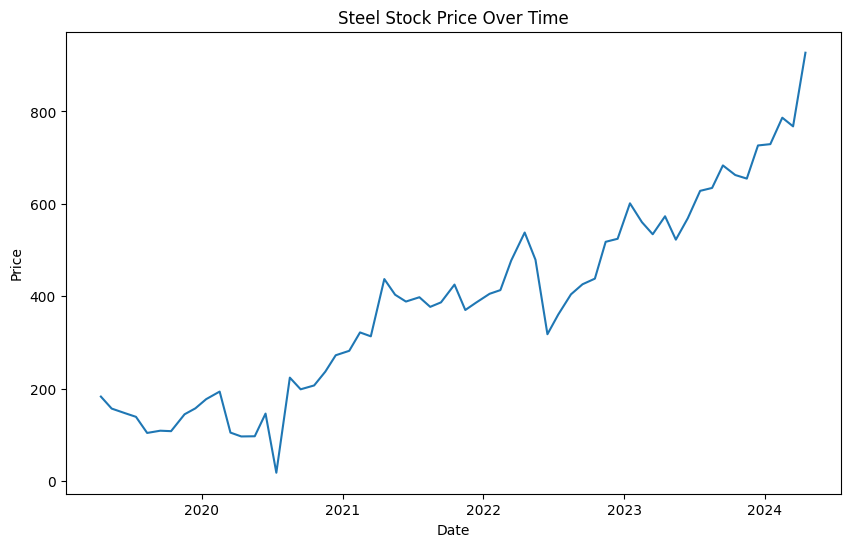

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Steel Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
# Define ARIMA model
model = ARIMA(train, order=(5,1,0)) # ARIMA(p,d,q) - You may need to tune these parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -255.120
Date:                Wed, 08 May 2024   AIC                            522.239
Time:                        06:13:33   BIC                            533.340
Sample:                             0   HQIC                           526.417
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2282      0.179     -1.272      0.203      -0.580       0.124
ar.L2         -0.0547      0.212     -0.258      0.796      -0.470       0.361
ar.L3         -0.0544      0.207     -0.263      0.7

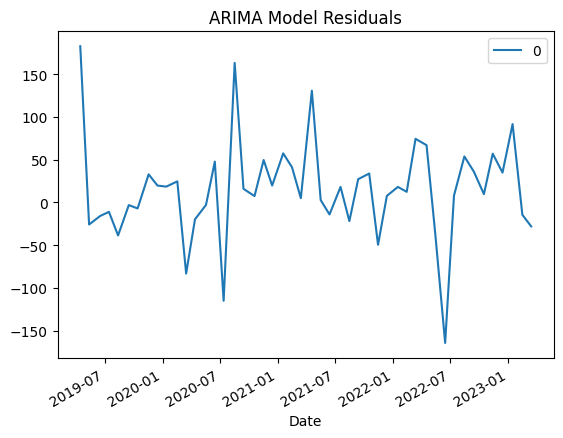

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Model Residuals')
plt.show()

In [ ]:
# Predictions
history = [x for x in train['Price']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Price'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=523.452776, expected=573.050000
predicted=565.984731, expected=522.400000
predicted=521.617322, expected=568.850000
predicted=564.336963, expected=628.100000
predicted=614.387838, expected=634.400000
predicted=623.555416, expected=683.200000
predicted=677.064918, expected=662.400000
predicted=655.945837, expected=654.650000
predicted=647.292687, expected=726.400000
predicted=706.760424, expected=729.250000
predicted=720.582362, expected=786.550000
predicted=776.798708, expected=767.750000
predicted=770.164591, expected=927.250000


In [ ]:
# Calculate RMSE (Root Mean Squared Error)
error = mean_squared_error(test['Price'], predictions, squared=False)
print('Test RMSE: %.3f' % error)

Test RMSE: 62.452


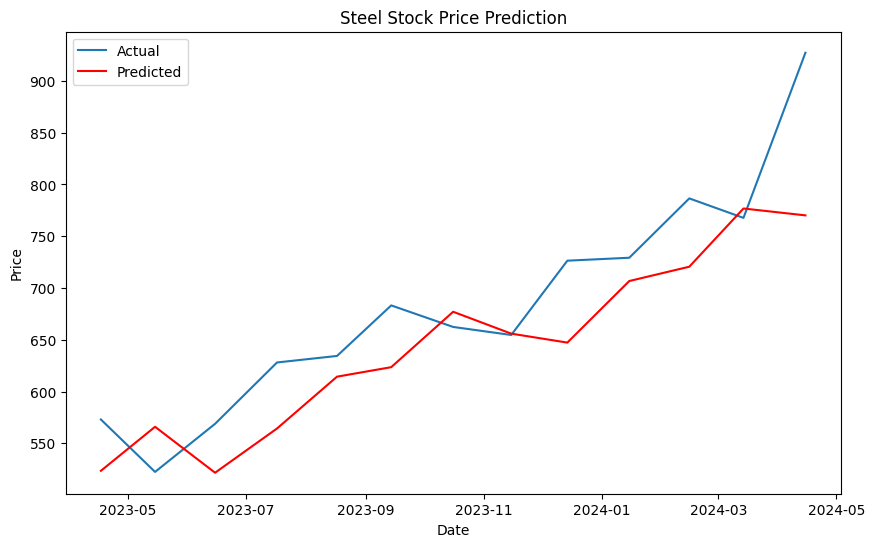

In [ ]:
# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Steel Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert price changes to binary classes (up or down)
test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)

# Calculate binary predictions
binary_predictions = [1 if pred > 0 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(test['Price_Class'], binary_predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(test['Price_Class'], binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

Accuracy: 0.6153846153846154
F1 Score: 0.761904761904762


<ipython-input-51-cc1386755167>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)


In [ ]:
data = pd.read_csv('/content/stock data/mukundstock.csv')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-53-1a72a8b5b870>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
print(data.head())

            Price
Date             
2019-04-15  56.25
2019-05-13  44.75
2019-06-17  50.82
2019-07-15  34.32
2019-08-13  34.20


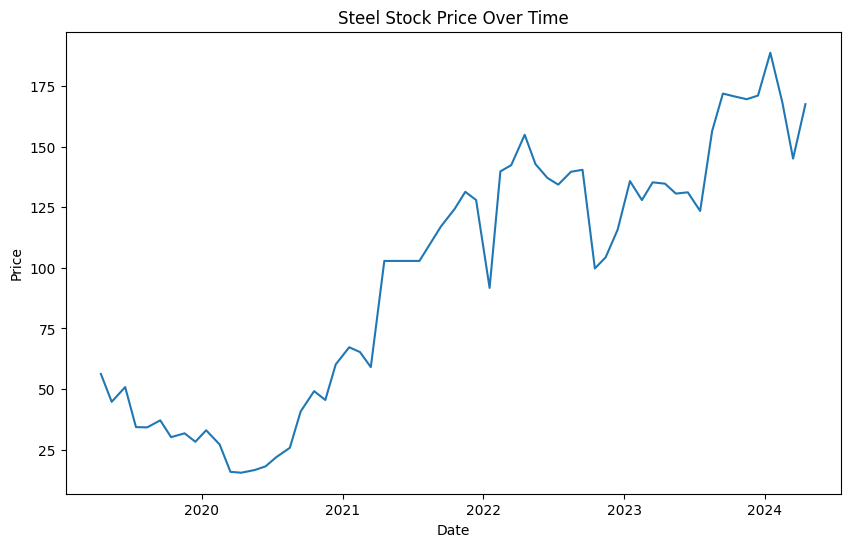

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Steel Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
model = ARIMA(train, order=(5,1,0)) # ARIMA(p,d,q) - You may need to tune these parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -189.755
Date:                Wed, 08 May 2024   AIC                            391.509
Time:                        06:19:45   BIC                            402.610
Sample:                             0   HQIC                           395.687
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2080      0.161     -1.289      0.197      -0.524       0.108
ar.L2         -0.0540      0.229     -0.235      0.814      -0.503       0.395
ar.L3         -0.0864      0.211     -0.410      0.6

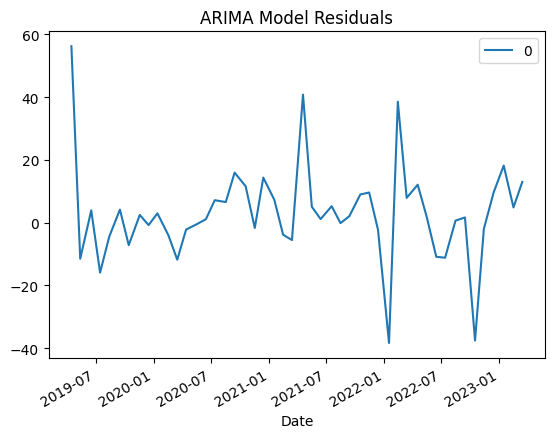

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Model Residuals')
plt.show()

In [ ]:
history = [x for x in train['Price']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Price'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=135.253364, expected=134.700000
predicted=140.553258, expected=130.620000
predicted=132.275310, expected=131.150000
predicted=131.527067, expected=123.450000
predicted=126.306041, expected=156.370000
predicted=148.218765, expected=171.870000
predicted=167.277034, expected=170.620000
predicted=165.588878, expected=169.550000
predicted=172.397998, expected=171.050000
predicted=178.149090, expected=188.720000
predicted=188.476411, expected=168.350000
predicted=170.709568, expected=145.050000
predicted=148.833871, expected=167.500000


In [ ]:
error = mean_squared_error(test['Price'], predictions, squared=False)
print('Test RMSE: %.3f' % error)

Test RMSE: 15.643


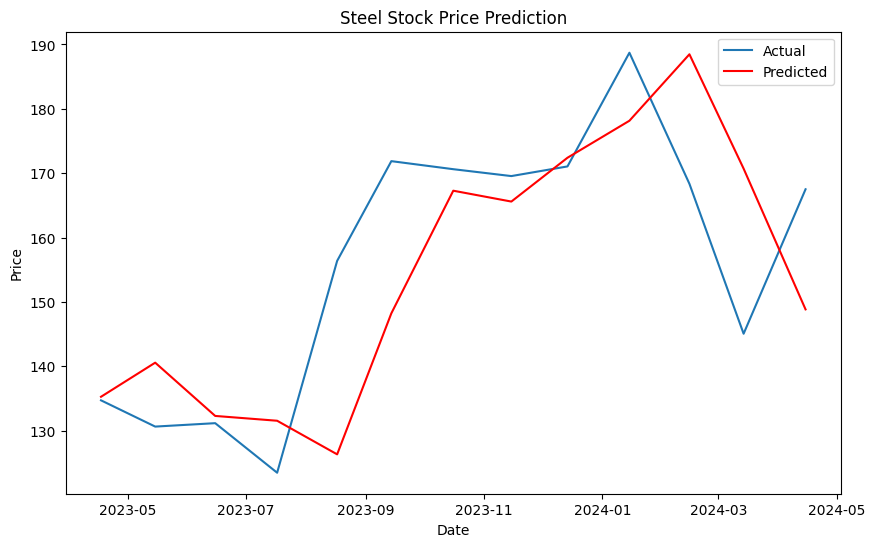

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Steel Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert price changes to binary classes (up or down)
test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)

# Calculate binary predictions
binary_predictions = [1 if pred > 0 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(test['Price_Class'], binary_predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(test['Price_Class'], binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

Accuracy: 0.46153846153846156
F1 Score: 0.631578947368421


<ipython-input-64-cc1386755167>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)


In [ ]:
data = pd.read_csv('/content/stock data/sailstock.csv')


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-67-1a72a8b5b870>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
print(data.head())

            Price
Date             
2019-04-15  58.20
2019-05-13  52.72
2019-06-17  48.82
2019-07-15  46.82
2019-08-13  37.45


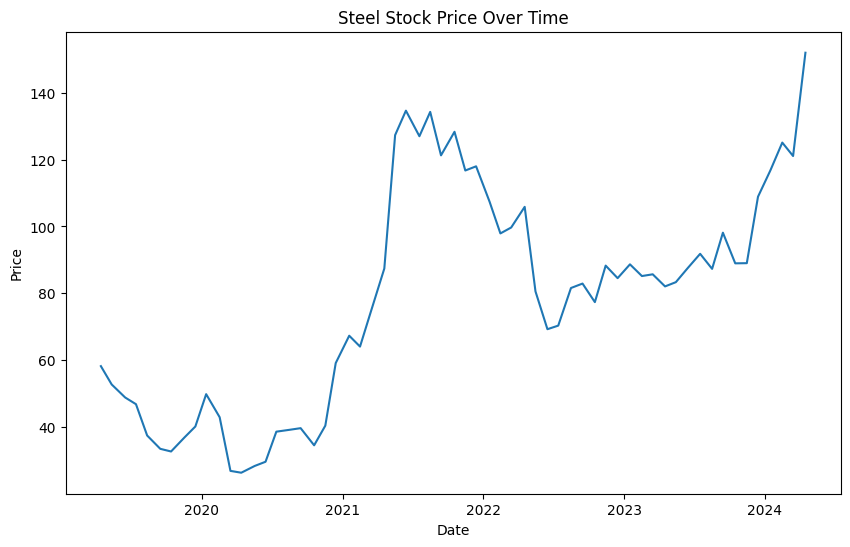

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'])
plt.title('Steel Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [ ]:
model = ARIMA(train, order=(5,1,0)) # ARIMA(p,d,q) - You may need to tune these parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   48
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -173.470
Date:                Wed, 08 May 2024   AIC                            358.939
Time:                        06:24:00   BIC                            370.040
Sample:                             0   HQIC                           363.117
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1801      0.301      0.599      0.549      -0.409       0.769
ar.L2          0.0154      0.167      0.092      0.927      -0.312       0.343
ar.L3         -0.0483      0.178     -0.271      0.7

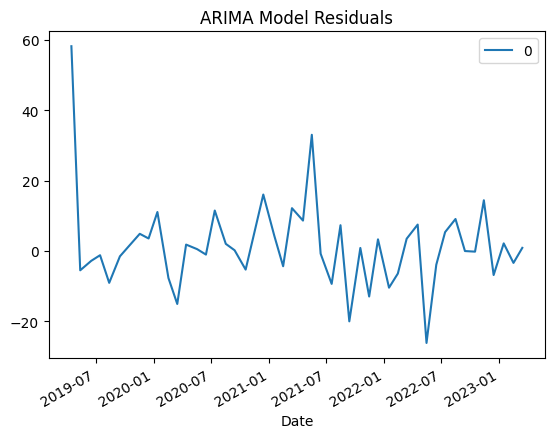

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARIMA Model Residuals')
plt.show()

In [ ]:
history = [x for x in train['Price']]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Price'].iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=87.168930, expected=82.050000
predicted=81.370320, expected=83.320000
predicted=83.787787, expected=87.560000
predicted=87.986844, expected=91.800000
predicted=92.302136, expected=87.300000
predicted=85.811475, expected=98.120000
predicted=100.284635, expected=88.950000
predicted=89.523555, expected=89.000000
predicted=88.235324, expected=108.870000
predicted=111.710267, expected=116.720000
predicted=119.067213, expected=125.070000
predicted=124.474214, expected=121.050000
predicted=121.731389, expected=151.950000


In [ ]:
error = mean_squared_error(test['Price'], predictions, squared=False)
print('Test RMSE: %.3f' % error)

Test RMSE: 11.688


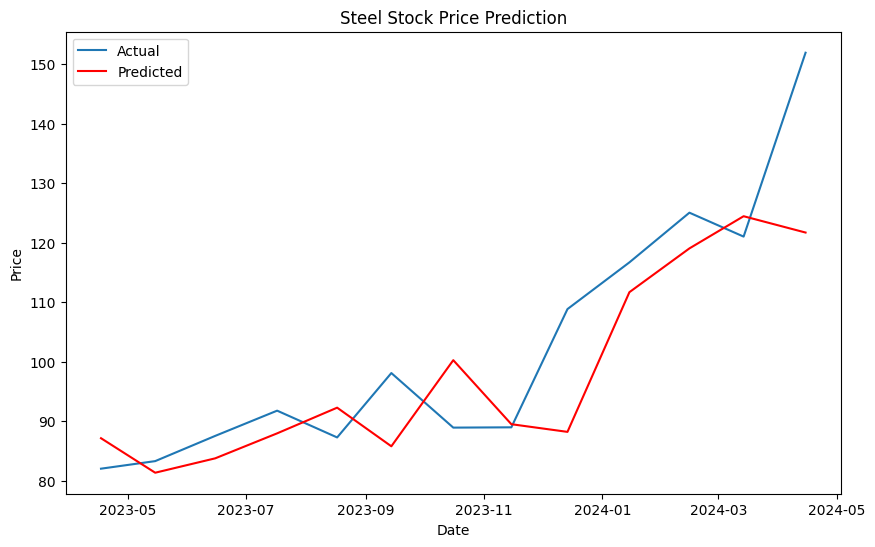

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Price'], label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('Steel Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convert price changes to binary classes (up or down)
test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)

# Calculate binary predictions
binary_predictions = [1 if pred > 0 else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(test['Price_Class'], binary_predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(test['Price_Class'], binary_predictions)

# Print the F1 score
print("F1 Score:", f1)

Accuracy: 0.6923076923076923
F1 Score: 0.8181818181818181


<ipython-input-78-cc1386755167>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Price_Class'] = np.where(test['Price'].diff().shift(-1) > 0, 1, 0)
